In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
!python -m spacy download en_core_web_sm

In [40]:
import spacy
nlp = spacy.load('en_core_web_sm')

**Part-Of-Speech (POS) Tagging**

In [41]:
# Create an nlp object
doc = nlp(""""John has Number of persons with the same mobile phone number are 4,
Total number of loan payments made by the client are 24 
and Number of months with any incoming payment in last 24 months are 25.""")
 
# Iterate over the tokens
for token in doc:
    # Print the token and its part-of-speech tag
    print(token, token.tag_, token.pos_, spacy.explain(token.tag_))

" `` PUNCT opening quotation mark
John NNP PROPN noun, proper singular
has VBZ VERB verb, 3rd person singular present
Number NN NOUN noun, singular or mass
of IN ADP conjunction, subordinating or preposition
persons NNS NOUN noun, plural
with IN ADP conjunction, subordinating or preposition
the DT DET determiner
same JJ ADJ adjective (English), other noun-modifier (Chinese)
mobile JJ ADJ adjective (English), other noun-modifier (Chinese)
phone NN NOUN noun, singular or mass
number NN NOUN noun, singular or mass
are VBP AUX verb, non-3rd person singular present
4 CD NUM cardinal number
, , PUNCT punctuation mark, comma

 _SP SPACE whitespace
Total JJ ADJ adjective (English), other noun-modifier (Chinese)
number NN NOUN noun, singular or mass
of IN ADP conjunction, subordinating or preposition
loan NN NOUN noun, singular or mass
payments NNS NOUN noun, plural
made VBN VERB verb, past participle
by IN ADP conjunction, subordinating or preposition
the DT DET determiner
client NN NOUN noun,

In [64]:
import spacy 
nlp = spacy.load('en_core_web_sm')

# Create an nlp object
doc = nlp(""""John has Number of persons with the same mobile phone number are 4,
Total number of loan payments made by the client are 24 
and Number of months with any incoming payment in last 24 months are 25.""")
 
# Iterate over the tokens
for token in doc:
    # Print the token and its part-of-speech tag
    print(token.text, "-->", token.dep_)

" --> punct
John --> nsubj
has --> ccomp
Number --> dobj
of --> prep
persons --> pobj
with --> prep
the --> det
same --> amod
mobile --> amod
phone --> compound
number --> pobj
are --> ccomp
4 --> attr
, --> punct

 --> dep
Total --> amod
number --> nsubj
of --> prep
loan --> compound
payments --> pobj
made --> acl
by --> agent
the --> det
client --> pobj
are --> ccomp
24 --> nsubj

 --> dep
and --> cc
Number --> conj
of --> prep
months --> pobj
with --> prep
any --> det
incoming --> amod
payment --> pobj
in --> prep
last --> amod
24 --> nummod
months --> pobj
are --> ROOT
25 --> attr
. --> punct


**Lemmatization**

In [65]:
import spacy 
nlp = spacy.load('en_core_web_sm')

# Create an nlp object
doc = nlp(""""John has Number of persons with the same mobile phone number are 4,
Total number of loan payments made by the client are 24 
and Number of months with any incoming payment in last 24 months are 25.""")
 
# Iterate over the tokens
for token in doc:
    # Print the token and its part-of-speech tag
    print(token.text, "-->", token.lemma_)

" --> "
John --> John
has --> have
Number --> number
of --> of
persons --> person
with --> with
the --> the
same --> same
mobile --> mobile
phone --> phone
number --> number
are --> be
4 --> 4
, --> ,

 --> 

Total --> total
number --> number
of --> of
loan --> loan
payments --> payment
made --> make
by --> by
the --> the
client --> client
are --> be
24 --> 24

 --> 

and --> and
Number --> number
of --> of
months --> month
with --> with
any --> any
incoming --> incoming
payment --> payment
in --> in
last --> last
24 --> 24
months --> month
are --> be
25 --> 25
. --> .


**Entity Detection**

In [45]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc= nlp(""""John has Number of persons with the same mobile phone number are 4,
Total number of loan payments made by the client are 24 
and Number of months with any incoming payment in last 24 months are 25.""")
entities=[(i, i.label_, i.label) for i in doc.ents]
entities

[(John, 'PERSON', 380),
 (4, 'CARDINAL', 397),
 (24, 'CARDINAL', 397),
 (Number of months, 'DATE', 391),
 (last 24 months, 'DATE', 391),
 (25, 'DATE', 391)]

In [46]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

In [47]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

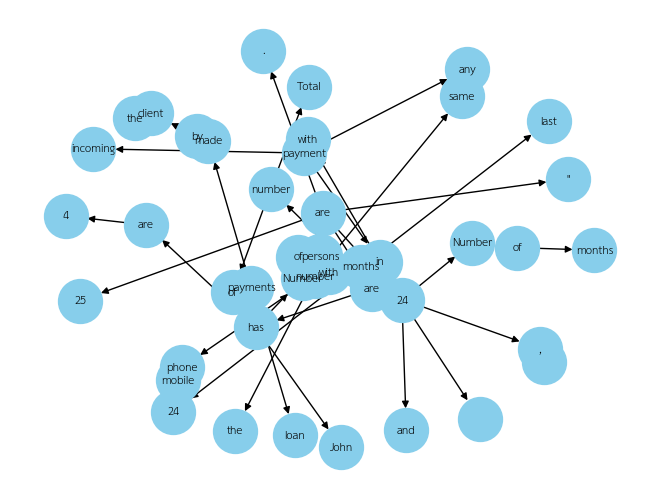

In [55]:
# Visualize dependencies (useful for debugging and understanding the parse tree)
from spacy import displacy

# Display dependency parse tree
displacy.render(doc, style='dep', jupyter=True)

# Step 2: Graph Construction
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on dependency parsing
for token in doc:
    G.add_node(token.i, text=token.text, pos=token.pos, dep=token.dep_)
    if token.head != token:
        G.add_edge(token.head.i, token.i, relation=token.dep)

# Optional: Draw the graph to visualize it (suitable for small examples)
nx.draw(G, with_labels=True, labels={node: G.nodes[node]['text'] for node in G.nodes}, font_family="TH Sarabun Chula",node_color='skyblue',node_size=1000)

In [66]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc1= nlp(""""John has Number of persons with the same mobile phone number are 4,
Total number of loan payments made by the client are 24 
and Number of months with any incoming payment in last 24 months are 25.""")
entities=[(i, i.label_, i.label) for i in doc.ents]
entities

[(John, 'PERSON', 380),
 (4, 'CARDINAL', 397),
 (24, 'CARDINAL', 397),
 (Number of months, 'DATE', 391),
 (last 24 months, 'DATE', 391),
 (25, 'DATE', 391)]

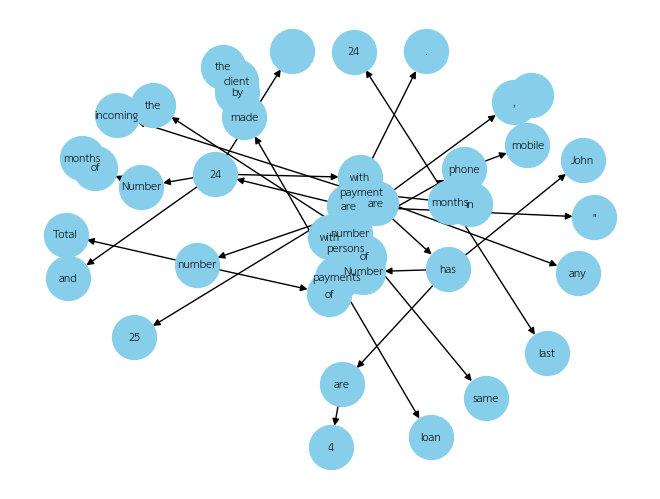

In [67]:
# Visualize dependencies (useful for debugging and understanding the parse tree)
from spacy import displacy

# Display dependency parse tree
displacy.render(doc1, style='dep', jupyter=True)

# Step 2: Graph Construction
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on dependency parsing
for token in doc1:
    G.add_node(token.i, text=token.text, pos=token.pos, dep=token.dep_)
    if token.head != token:
        G.add_edge(token.head.i, token.i, relation=token.dep)

# Optional: Draw the graph to visualize it (suitable for small examples)
nx.draw(G, with_labels=True, labels={node: G.nodes[node]['text'] for node in G.nodes}, font_family="TH Sarabun Chula",node_color='skyblue',node_size=1000)

In [63]:
displacy.render(doc, style = "ent",jupyter = True)

**Similarity** 

In [56]:
import spacy

nlp = spacy.load("en_core_web_sm")
tokens = nlp(""""John has Number of persons with the same mobile phone number are 4,
Total number of loan payments made by the client are 24 
and Number of months with any incoming payment in last 24 months are 25.""")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

" True 100.60739 False
John True 74.91001 False
has True 91.15189 False
Number True 41.813812 False
of True 120.9016 False
persons True 52.88729 False
with True 61.86554 False
the True 72.329216 False
same True 58.136192 False
mobile True 45.230625 False
phone True 56.11153 False
number True 55.262165 False
are True 89.23195 False
4 True 115.24142 False
, True 64.72698 False

 False 0.0 True
Total True 42.59439 False
number True 55.262165 False
of True 120.9016 False
loan True 79.04901 False
payments True 53.147007 False
made True 65.23248 False
by True 137.20668 False
the True 72.329216 False
client True 47.922207 False
are True 89.23195 False
24 True 121.22002 False

 False 0.0 True
and True 60.75837 False
Number True 41.813812 False
of True 120.9016 False
months True 61.701466 False
with True 61.86554 False
any True 86.272545 False
incoming True 37.914024 False
payment True 55.867607 False
in True 110.41568 False
last True 60.74238 False
24 True 121.22002 False
months True 61.701466

In [90]:
#50column
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc50= nlp(""""John has Number of persons with the same mobile phone number are 4,
Total number of loan payments made by the client are 24 , Number of months with any incoming payment in last 24 months are 25
, Maximum number of unpaid instalments are 18,Interest rate are 0.42 , Number of paid instalments are 109,Number of incoming payments are 145 ,
Percentage of installments that are paid 1 or more days after the due date are 0.08333 , Monthly annuity amount for the applicant are 62 ,
Reason for rejection on the most recent rejected application is P99_56_166 , Level of education of the client provided by external source is 6b2ae0fa ,
Number of credit bureau queries for the last 30 days are 1 , Number of Credit Bureau queries for last 360 days are 13 ,
Number of credit bureau queries for last 180 days are 3 , Number of results in third quarter are 6 , Number of credit bureau queries for the last 120 days are 3 ,
firstquarter_103L are 11 , District of person's registered address is P99_153_174,Education level of the person is a55475b1 ,
Amount of the main income of the client is 59600 , Type of income of the person is RETIRED_PENSIONER,District where the employer's address is a55475b1 ,
House type of the person is OWNED,Contact type of a person is PRIMARY_MOBILE,Number of outstanding instalments for active contracts are 22 ,
Total amount of active contracts in the credit bureau are 105794.6 , Categorization of clients by credit bureau is a55475b1,Maximal days past due for active contract are 15 ,
Total amount of closed contracts are 24305.6 , Total outstanding debt for active contracts in the credit bureau are 112864.2,Number of instalments of the active contract are 40 ,
Maximal past due amount for an active contract are 2143.2 , Number of active contracts in credit bureau are 3""")
entities=[(i, i.label_, i.label) for i in doc.ents]
entities

[(John, 'PERSON', 380),
 (4, 'CARDINAL', 397),
 (24, 'CARDINAL', 397),
 (Number of months, 'DATE', 391),
 (last 24 months, 'DATE', 391),
 (25, 'DATE', 391)]

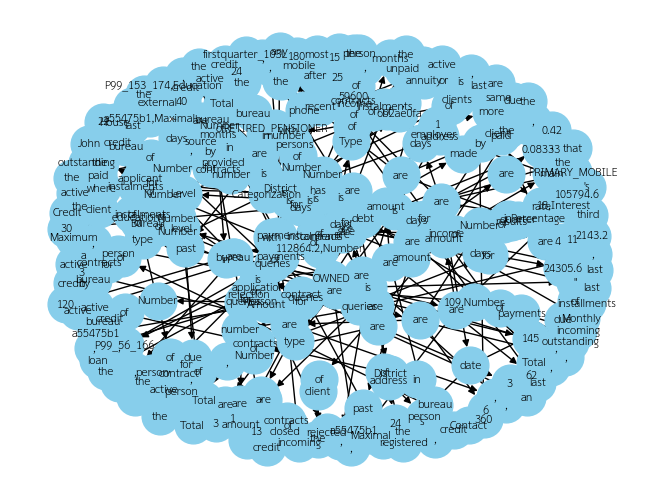

In [91]:
# Visualize dependencies (useful for debugging and understanding the parse tree)
from spacy import displacy

# Display dependency parse tree
displacy.render(doc50, style='dep', jupyter=True)

# Step 2: Graph Construction
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on dependency parsing
for token in doc50:
    G.add_node(token.i, text=token.text, pos=token.pos, dep=token.dep_)
    if token.head != token:
        G.add_edge(token.head.i, token.i, relation=token.dep)

# Optional: Draw the graph to visualize it (suitable for small examples)
nx.draw(G, with_labels=True, labels={node: G.nodes[node]['text'] for node in G.nodes}, font_family="TH Sarabun Chula",node_color='skyblue',node_size=700)

In [74]:
!pip3 install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 651.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 1.1 MB/s eta 0:00:00a 0:00:01


In [75]:
!cairosvg image.svg -o image.png

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/urllib/request.py", line 1505, in open_local_file
    stats = os.stat(localfile)
FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/image.svg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/bin/cairosvg", line 8, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.10/site-packages/cairosvg/__main__.py", line 78, in main
    SURFACES[output_format.upper()].convert(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/cairosvg/surface.py", line 129, in convert
    tree = Tree(
  File "/opt/conda/lib/python3.10/site-packages/cairosvg/parser.py", line 386, in __init__
    bytestring = self.fetch_url(
  File "/opt/conda/lib/python3.10/site-packages/cairosvg/parser.py", line 243, in fetch_url
    return read_url(url, self.url_fetcher, resource_type)
  File "/opt/conda/lib/python3.10/site-packages/cairosvg/url.p

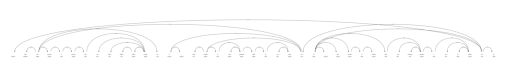

<Figure size 640x480 with 0 Axes>

In [80]:
import spacy
from spacy import displacy
import cairosvg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Render displacy to SVG
svg = displacy.render(doc, style='dep', jupyter=False)

# Convert SVG to PNG using cairosvg
output_path = '/kaggle/working/dependency_parse.png'
cairosvg.svg2png(bytestring=svg.encode('utf-8'), write_to=output_path)

# Optional: If you still want to use PIL to handle the image
# Save the SVG content to a temporary file
with open("dependency_parse.svg", "w", encoding="utf-8") as f:
    f.write(svg)

# Convert SVG to PNG using cairosvg
cairosvg.svg2png(url="dependency_parse.svg", write_to="/kaggle/working/dependency_parse_from_svg.png")

# Load and display the PNG using matplotlib
img = mpimg.imread(output_path)
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

graph_output_path = '/kaggle/working/dependency_graph.png'
plt.savefig(graph_output_path, format='PNG')
plt.show()

In [92]:
import spacy

nlp = spacy.load("en_core_web_lg")
tokens = nlp(""""John has Number of persons with the same mobile phone number are 4,
Total number of loan payments made by the client are 24 , Number of months with any incoming payment in last 24 months are 25
, Maximum number of unpaid instalments are 18,Interest rate are 0.42 , Number of paid instalments are 109,Number of incoming payments are 145 ,
Percentage of installments that are paid 1 or more days after the due date are 0.08333 , Monthly annuity amount for the applicant are 62 ,
Reason for rejection on the most recent rejected application is P99_56_166 , Level of education of the client provided by external source is 6b2ae0fa ,
Number of credit bureau queries for the last 30 days are 1 , Number of Credit Bureau queries for last 360 days are 13 ,
Number of credit bureau queries for last 180 days are 3 , Number of results in third quarter are 6 , Number of credit bureau queries for the last 120 days are 3 ,
firstquarter_103L are 11 , District of person's registered address is P99_153_174,Education level of the person is a55475b1 ,
Amount of the main income of the client is 59600 , Type of income of the person is RETIRED_PENSIONER,District where the employer's address is a55475b1 ,
House type of the person is OWNED,Contact type of a person is PRIMARY_MOBILE,Number of outstanding instalments for active contracts are 22 ,
Total amount of active contracts in the credit bureau are 105794.6 , Categorization of clients by credit bureau is a55475b1,Maximal days past due for active contract are 15 ,
Total amount of closed contracts are 24305.6 , Total outstanding debt for active contracts in the credit bureau are 112864.2,Number of instalments of the active contract are 40 ,
Maximal past due amount for an active contract are 2143.2 , Number of active contracts in credit bureau are 3""")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

" True 100.60739 False
John True 74.91001 False
has True 91.15189 False
Number True 41.813812 False
of True 120.9016 False
persons True 52.88729 False
with True 61.86554 False
the True 72.329216 False
same True 58.136192 False
mobile True 45.230625 False
phone True 56.11153 False
number True 55.262165 False
are True 89.23195 False
4 True 115.24142 False
, True 64.72698 False

 False 0.0 True
Total True 42.59439 False
number True 55.262165 False
of True 120.9016 False
loan True 79.04901 False
payments True 53.147007 False
made True 65.23248 False
by True 137.20668 False
the True 72.329216 False
client True 47.922207 False
are True 89.23195 False
24 True 121.22002 False
, True 64.72698 False
Number True 41.813812 False
of True 120.9016 False
months True 61.701466 False
with True 61.86554 False
any True 86.272545 False
incoming True 37.914024 False
payment True 55.867607 False
in True 110.41568 False
last True 60.74238 False
24 True 121.22002 False
months True 61.701466 False
are True 89.

In [93]:
displacy.render(doc50, style = "ent",jupyter = True)

In [106]:
#50column
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_lg")
doc50_1= nlp(""""John has Number of persons with the same mobile phone number are 4 ,
Total number of loan payments made by the client are 24 , Number of months with any incoming payment in last 24 months are 25
, Maximum number of unpaid instalments are 18,Interest rate are 0.42 , Number of paid instalments are 109,Number of incoming payments are 145 ,
Percentage of installments that are paid 1 or more days after the due date are 0.08333 , Monthly annuity amount for the applicant are 62 ,
Reason for rejection on the most recent rejected application is P99_56_166 , Level of education of the client provided by external source is 6b2ae0fa ,
Number of credit bureau queries for the last 30 days are 1,Number of Credit Bureau queries for last 360 days are 13 ,
Number of credit bureau queries for last 180 days are 3 , Number of results in third quarter are 6,Number of credit bureau queries for the last 120 days are 3 ,
Number of results obtained from credit bureau in the first quarter are 11 , District of person's registered address is P99_153_174 , Education level of the person is a55475b1 ,
Amount of the main income of the client is 59600 , Type of income of the person is RETIRED_PENSIONER , District where the employer's address is a55475b1 ,
House type of the person is OWNED,Contact type of a person is PRIMARY_MOBILE,Number of outstanding instalments for active contracts are 22,
Total amount of active contracts in the credit bureau are 105794.6 , Categorization of clients by credit bureau is a55475b1 , Maximal days past due for active contract are 15 ,
Total amount of closed contracts are 24305.6,Total outstanding debt for active contracts in the credit bureau are 112864.2 , Number of instalments of the active contract are 40 ,
Maximal past due amount for an active contract are 2143.2 , Number of active contracts in credit bureau are 3""")
entities=[(i, i.label_, i.label) for i in doc.ents]
entities

[(John, 'PERSON', 380),
 (4, 'CARDINAL', 397),
 (24, 'CARDINAL', 397),
 (Number of months, 'DATE', 391),
 (last 24 months, 'DATE', 391),
 (25, 'DATE', 391)]

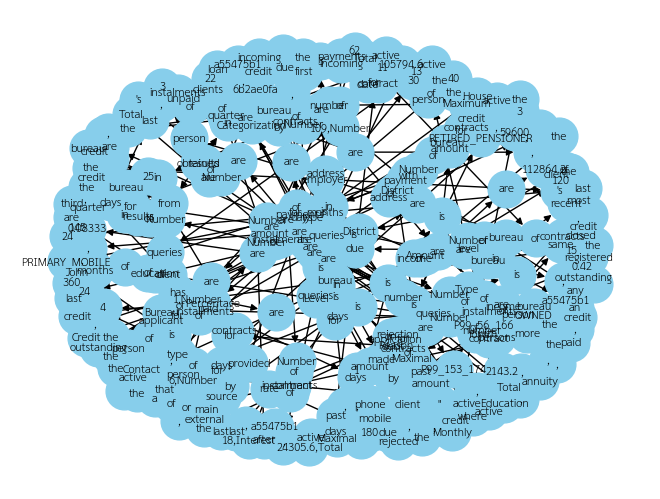

In [102]:
# Visualize dependencies (useful for debugging and understanding the parse tree)
from spacy import displacy

# Display dependency parse tree
displacy.render(doc50_1, style='dep', jupyter=True)

# Step 2: Graph Construction
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on dependency parsing
for token in doc50_1:
    G.add_node(token.i, text=token.text, pos=token.pos, dep=token.dep_)
    if token.head != token:
        G.add_edge(token.head.i, token.i, relation=token.dep)

# Optional: Draw the graph to visualize it (suitable for small examples)
nx.draw(G, with_labels=True, labels={node: G.nodes[node]['text'] for node in G.nodes}, font_family="TH Sarabun Chula",node_color='skyblue',node_size=700,font_size=12)

In [97]:
displacy.render(doc50_1, style = "ent",jupyter = True)

Error during SVG to PNG conversion: cairo returned CAIRO_STATUS_INVALID_SIZE: b'invalid value (typically too big) for the size of the input (surface, pattern, etc.)'
PNG file was not created: /kaggle/working/dependency_parse_50.png


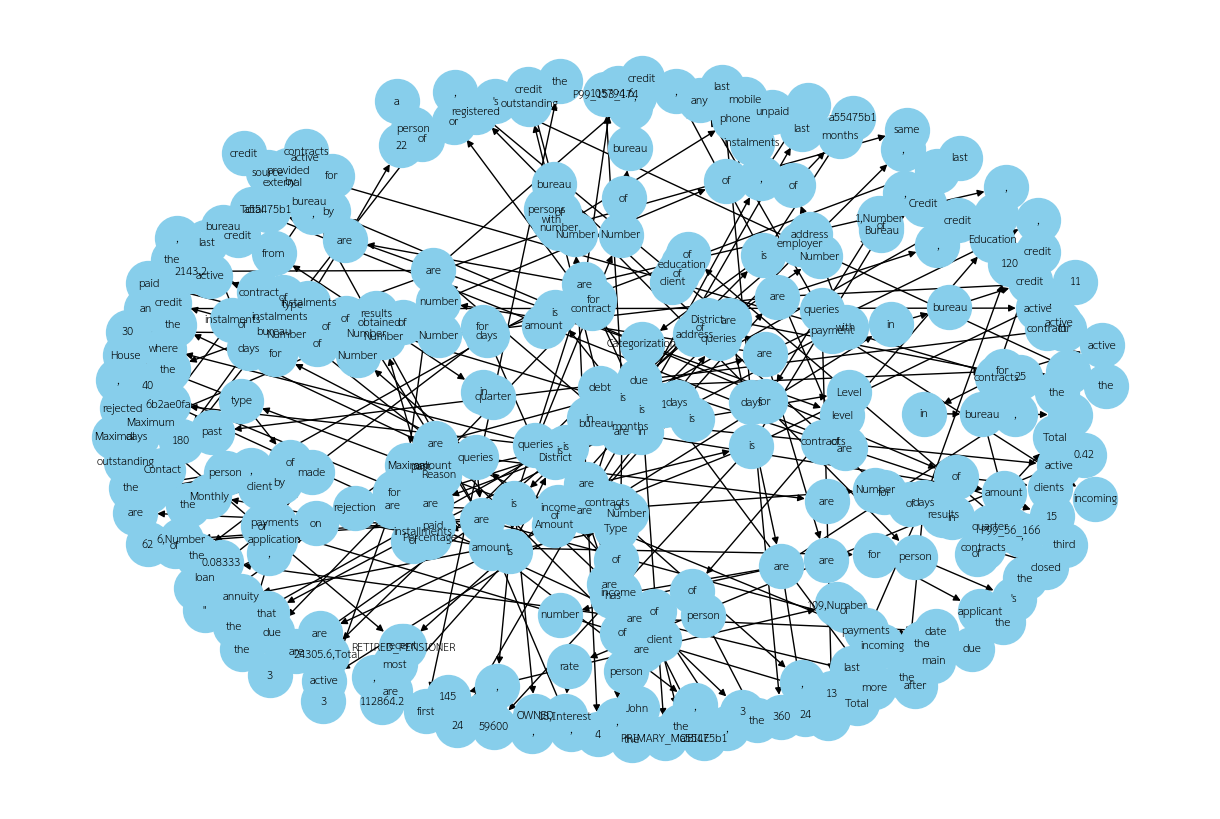

In [104]:
import spacy
from spacy import displacy
import cairosvg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
import os


# Render displacy to SVG with specified width and height
svg = displacy.render(doc50_1, style='dep', jupyter=False, options={'compact': True})

# Save the SVG content to a file for troubleshooting
svg_path = "/kaggle/working/dependency_parse_50.svg"
with open(svg_path, "w", encoding="utf-8") as f:
    f.write(svg)

# Check the SVG size and reduce it if necessary
output_png_path = '/kaggle/working/dependency_parse_50.png'
try:
    cairosvg.svg2png(bytestring=svg.encode('utf-8'), write_to=output_png_path)
except Exception as e:
    print(f"Error during SVG to PNG conversion: {e}")

# Verify if PNG file was created
if os.path.exists(output_png_path):
    # Load and display the PNG using matplotlib
    img = mpimg.imread(output_png_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()
else:
    print(f"PNG file was not created: {output_png_path}")

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on dependency parsing
for token in doc50_1:
    G.add_node(token.i, text=token.text, pos=token.pos_, dep=token.dep_)
    if token.head != token:
        G.add_edge(token.head.i, token.i, relation=token.dep_)

# Draw the graph to visualize it (suitable for small examples)
pos = nx.spring_layout(G)
labels = {node: G.nodes[node]['text'] for node in G.nodes}
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, labels=labels, node_color='skyblue', node_size=1000, font_size=12, font_family='TH Sarabun Chula')

# Save the graph to a file
graph_output_path = '/kaggle/working/dependency_graph_50.png'
plt.savefig(graph_output_path, format='PNG')
plt.show()

In [110]:
#50column
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_lg")
doc50_column= nlp("""John has mobilephncnt_593L is 4 , pmtnum_254L is 24 , cntpmts24_3658933L is 25 , 
numinstunpaidmax_3546851L is 18 , eir_270L is 0.42 , numinstlsallpaid_934L is 109 , numincomingpmts_3546848L is 145 ,
pctinstlsallpaidlate1d_3546856L is 0.08333 , monthsannuity_845L is 62 , lastrejectreason_759M is P99_56_166 , 
education_1103M is 6b2ae0fa , days30_165L is 1 , days360_512L is 13 , days180_256L is 3 , thirdquarter_1082L is 6 ,
days120_123L is 3 , firstquarter_103L is 11 , registaddr_district_1083M is P99_153_174 , education_927M is a55475b1 , 
mainoccupationinc_384A is 59600 , incometype_1044T is RETIRED_PENSIONER , empladdr_district_926M is a55475b1 , 
housetype_905L is OWNED , type_25L is PRIMARY_MOBILE , numberofoverdueinstlmax_1039L is 22 , totalamount_996A is 105794.6 , 
description_351M is a55475b1 , dpdmax_139P is 15 , totalamount_6A is 24305.6 , totaloutstanddebtvalue_39A is 112864.2 , 
numberofinstls_320L is 40 , overdueamountmax2_14A is 2143.2 , numberofcontrsvalue_258L is 3""")
entities=[(i, i.label_, i.label) for i in doc.ents]
entities

[(John, 'PERSON', 380),
 (4, 'CARDINAL', 397),
 (24, 'CARDINAL', 397),
 (Number of months, 'DATE', 391),
 (last 24 months, 'DATE', 391),
 (25, 'DATE', 391)]

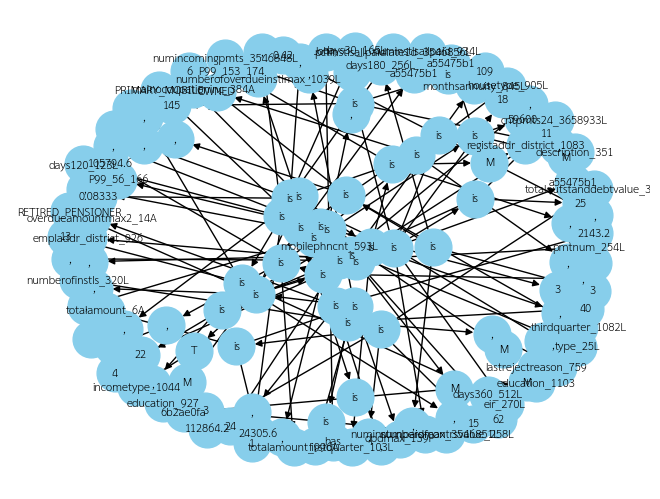

In [111]:
# Visualize dependencies (useful for debugging and understanding the parse tree)
from spacy import displacy

# Display dependency parse tree
displacy.render(doc50_column, style='dep', jupyter=True)

# Step 2: Graph Construction
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on dependency parsing
for token in doc50_column:
    G.add_node(token.i, text=token.text, pos=token.pos, dep=token.dep_)
    if token.head != token:
        G.add_edge(token.head.i, token.i, relation=token.dep)

# Optional: Draw the graph to visualize it (suitable for small examples)
nx.draw(G, with_labels=True, labels={node: G.nodes[node]['text'] for node in G.nodes}, font_family="TH Sarabun Chula",node_color='skyblue',node_size=700,font_size=12)

In [112]:
displacy.render(doc50_column, style = "ent",jupyter = True)